In [1]:
import sys
import os
import gc
# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
from MnistHelperFunctions.get_standard_data import preprocessed_mnist, preprocessed_fashion_mnist, preprocessed_k_mnist

inside getting data


In [3]:
from ZeroHelperFunctions.zeroTrainer import ZeroTrainer
from Networks.networks import FullyConnectedNet, FullyConnectedNet_powerful
from ZeroHelperFunctions.DataLoadersForZero import DataLoadersForZero
from ZeroHelperFunctions import plots
from ZeroHelperFunctions.JamesWeb import JamesWeb
from ZeroHelperFunctions.Accuracy_fn import repository_accuracy_fn


In [4]:
import torch
from torch import nn

# label for zero classes is number of non-zero classes.

In [5]:
NUM_EPOCHS = 100

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


# MNIST

inside getting data3
inside getting data2


Data format: 
--------------------------------
type(train_data.data[0]) -> <class 'torch.Tensor'>
train_data.data[0].dtype -> torch.float32

type(train_data.targets) -> <class 'torch.Tensor'>
train_data.targets.dtype -> torch.int64


Access Data by indexing
--------------------------------
train_data[0] -> (torch.Size([28, 28]), torch.Size([]))


max and min values of train_data.data:
--------------------------------
	[(tensor(0.), tensor(1.))]





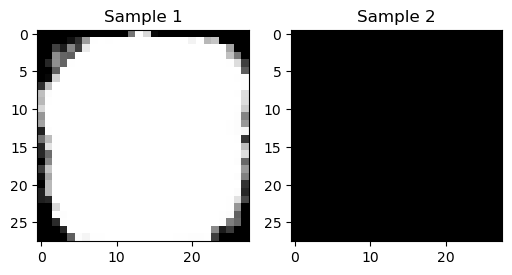

KeyboardInterrupt: 

In [7]:

BATCH_SIZE = 256

mnist_train_data, mnist_test_data = preprocessed_mnist()


mnist_dl = DataLoadersForZero(train_data=mnist_train_data,
                        test_data=mnist_test_data,
                        image_shape=(1, 28, 28))
mnist_dl.make_dataloaders(batch_size=BATCH_SIZE, 
                    n_train_zeros=600_000, 
                    n_test_zeros=10_000,
                    label_for_zero=10)
mnist_dl.generate_zero_class_dataloader(100_000, BATCH_SIZE)



NUM_DIMENSIONS = 28*28

learning_rate = 0.01

mnist_zero_model = FullyConnectedNet(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 10,
                    layer2_dim=NUM_DIMENSIONS * 5,
                    layer3_dim=11*10,
                    num_classes=11)
# Import PyTorch


mnist_zero_trainer = ZeroTrainer(model=mnist_zero_model,
                        number_of_non_zero_classes=10,
                        train_dl=mnist_dl.train0_dataloader,
                        test_dl=mnist_dl.test_dataloader,
                        purity_fact_dl=mnist_dl.test0_dataloader,
                        zero_dl=mnist_dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=mnist_zero_model.parameters(), lr=learning_rate),
                        label_of_zero_class=10,
                        device="cuda" if torch.cuda.is_available() else "cpu")

mnist_zero_trainer = ZeroTrainer(model=mnist_zero_model,
                        number_of_non_zero_classes=10,
                        train_dl=mnist_dl.train0_dataloader,
                        test_dl=mnist_dl.test_dataloader,
                        purity_fact_dl=mnist_dl.test0_dataloader,
                        zero_dl=mnist_dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=mnist_zero_model.parameters(), lr=learning_rate),
                        label_of_zero_class=10,
                        device="cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
torch.cuda.is_available()

In [ ]:
mnist_zero_trainer.train(epochs=NUM_EPOCHS)

In [ ]:
plots.plot_pf(mnist_zero_trainer.purities, title="MNIST")
plots.plot_of(mnist_zero_trainer.occupancy, title="MNIST")
plots.plot_train_test_losses(mnist_zero_trainer.train_loss,
                             mnist_zero_trainer.test_loss, title="MNIST")
plots.plot_train_test_accs(mnist_zero_trainer.train_acc,
                           mnist_zero_trainer.test_acc, title="MNIST")

In [ ]:

james = JamesWeb(device="cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
james.add_model(model=mnist_zero_model,
                model_name="MNIST",
                model_zero_class_label=10)
mnist_test_data.targets = james.convert_labels(mnist_test_data.targets, model_name="MNIST")


In [ ]:
james.predictions(mnist_test_data.data[:10]), mnist_test_data.targets[:10]

In [ ]:
MNIST_test_dataset = torch.utils.data.TensorDataset(mnist_test_data.data, mnist_test_data.targets)
MNIST_dataloader = torch.utils.data.DataLoader(MNIST_test_dataset, batch_size=256, shuffle=True)
acc1=0
for X, y in MNIST_dataloader:
    predictions = james.predictions(X)
    acc1 += repository_accuracy_fn(y, predictions)
acc1 = acc1/len(MNIST_dataloader)
acc1

# FashionMNIST

In [ ]:
fashion_BATCH_SIZE = 256

fashion_mnist_train_data, fashion_mnist_test_data = preprocessed_fashion_mnist()

fashion_mnist_dl = DataLoadersForZero(train_data=fashion_mnist_train_data,
                        test_data=fashion_mnist_test_data,
                        image_shape=(1, 28, 28))
fashion_mnist_dl.make_dataloaders(batch_size=fashion_BATCH_SIZE, 
                    n_train_zeros=600_000, 
                    n_test_zeros=10_000,
                    label_for_zero=10)

fashion_mnist_dl.generate_zero_class_dataloader(100_000, fashion_BATCH_SIZE)


NUM_DIMENSIONS = 28*28

learning_rate = 0.01

fashion_mnist_zero_model = FullyConnectedNet_powerful(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 15,
                    layer2_dim=NUM_DIMENSIONS * 10,
                    layer3_dim=NUM_DIMENSIONS * 5,
                    layer4_dim= NUM_DIMENSIONS,
                    layer5_dim=11*10,
                    num_classes=11)

fashion_mnist_zero_trainer = ZeroTrainer(model=fashion_mnist_zero_model,
                        number_of_non_zero_classes=10,
                        train_dl=fashion_mnist_dl.train0_dataloader,
                        test_dl=fashion_mnist_dl.test_dataloader,
                        purity_fact_dl=fashion_mnist_dl.test0_dataloader,
                        zero_dl=fashion_mnist_dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=fashion_mnist_zero_model.parameters(), lr=learning_rate),
                        label_of_zero_class=10,
                        device="cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
fashion_mnist_zero_trainer.train(epochs=NUM_EPOCHS)

In [ ]:
plots.plot_pf(fashion_mnist_zero_trainer.purities, title="FashionMNIST")
plots.plot_of(fashion_mnist_zero_trainer.occupancy, title="FashionMNIST")
plots.plot_train_test_losses(fashion_mnist_zero_trainer.train_loss,
                             fashion_mnist_zero_trainer.test_loss, title="FashionMNIST")
plots.plot_train_test_accs(fashion_mnist_zero_trainer.train_acc,
                           fashion_mnist_zero_trainer.test_acc, title="FashionMNIST")

In [ ]:
james.add_model(model=fashion_mnist_zero_model,
                model_name="FashionMNIST",
                model_zero_class_label=10)
fashion_mnist_test_data.targets = james.convert_labels(fashion_mnist_test_data.targets, 
                                                       model_name="FashionMNIST")

In [ ]:
james.predictions(fashion_mnist_test_data.data[:10]), fashion_mnist_test_data.targets[:10]

In [ ]:
MNIST_and_FMNIST_data = torch.cat((mnist_test_data.data, fashion_mnist_test_data.data), dim=0)
MNIST_and_FMNIST_labels = torch.cat((mnist_test_data.targets, fashion_mnist_test_data.targets), dim=0)

In [ ]:
MNIST_and_FMNIST_test_dataset = torch.utils.data.TensorDataset(MNIST_and_FMNIST_data, MNIST_and_FMNIST_labels)
MNIST_and_FMNIST_dataloader = torch.utils.data.DataLoader(MNIST_and_FMNIST_test_dataset, batch_size=256, shuffle=True)
acc2=0
for X, y in MNIST_and_FMNIST_dataloader:
    predictions = james.predictions(X)
    acc2 += repository_accuracy_fn(y, predictions)
acc2 = acc2/len(MNIST_and_FMNIST_dataloader)
acc2

# KMNIST

In [ ]:
k_BATCH_SIZE = 256

k_mnist_train_data, k_mnist_test_data = preprocessed_k_mnist()

k_mnist_dl = DataLoadersForZero(train_data=k_mnist_train_data,
                        test_data=k_mnist_test_data,
                        image_shape=(1, 28, 28))
k_mnist_dl.make_dataloaders(batch_size=k_BATCH_SIZE, 
                    n_train_zeros=600_000, 
                    n_test_zeros=10_000,
                    label_for_zero=10)
k_mnist_dl.generate_zero_class_dataloader(100_000, k_BATCH_SIZE)


NUM_DIMENSIONS = 28*28
learning_rate = 0.01


k_mnist_zero_model = FullyConnectedNet_powerful(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 15,
                    layer2_dim=NUM_DIMENSIONS * 10,
                    layer3_dim=NUM_DIMENSIONS * 5,
                    layer4_dim= NUM_DIMENSIONS,
                    layer5_dim=11*10,
                    num_classes=11)
k_mnist_zero_trainer = ZeroTrainer(model=k_mnist_zero_model,
                        number_of_non_zero_classes=10,
                        train_dl=k_mnist_dl.train0_dataloader,
                        test_dl=k_mnist_dl.test_dataloader,
                        purity_fact_dl=k_mnist_dl.test0_dataloader,
                        zero_dl=k_mnist_dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=k_mnist_zero_model.parameters(), lr=learning_rate),
                        label_of_zero_class=10,
                        device="cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
k_mnist_zero_trainer.train(epochs=NUM_EPOCHS)

In [ ]:
plots.plot_pf(k_mnist_zero_trainer.purities, title="KMNIST")
plots.plot_of(k_mnist_zero_trainer.occupancy, title="KMNIST")
plots.plot_train_test_losses(k_mnist_zero_trainer.train_loss,
                             k_mnist_zero_trainer.test_loss, title="KMNIST")
plots.plot_train_test_accs(k_mnist_zero_trainer.train_acc,
                           k_mnist_zero_trainer.test_acc, title="KMNIST")

In [ ]:
james.add_model(k_mnist_zero_model, "KMNIST", 
                model_zero_class_label=10)
k_mnist_test_data.targets = james.convert_labels(k_mnist_test_data.targets,
                                                 model_name="KMNIST")

In [ ]:
james.predictions(k_mnist_test_data.data[:20]), k_mnist_test_data.targets[:20]

In [ ]:
MNIST_FMNIST_and_KMNIST_data = torch.cat((mnist_test_data.data, fashion_mnist_test_data.data, k_mnist_test_data.data), dim=0)
MNIST_FMNIST_and_KMNIST_labels = torch.cat((mnist_test_data.targets, fashion_mnist_test_data.targets, k_mnist_test_data.targets), dim=0)

In [ ]:
MNIST_FMNIST_and_KMNIST_test_dataset = torch.utils.data.TensorDataset(MNIST_FMNIST_and_KMNIST_data, MNIST_FMNIST_and_KMNIST_labels)
MNIST_FMNIST_and_KMNIST_dataloader = torch.utils.data.DataLoader(MNIST_FMNIST_and_KMNIST_test_dataset, batch_size=256, shuffle=True)
acc3=0
for X, y in MNIST_FMNIST_and_KMNIST_dataloader:
    predictions = james.predictions(X)
    acc3 += repository_accuracy_fn(y, predictions)
acc3 = acc3/len(MNIST_FMNIST_and_KMNIST_dataloader)
acc3